In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("Fraud Detection Dataset.csv")
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0


In [3]:
data.shape

(51000, 12)

In [4]:
data.size

612000

In [9]:
data.dtypes

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

In [11]:
data.ndim

2

In [13]:
data.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')

In [15]:
data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [17]:
data.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card,0
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking,1
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking,0
50999,T13665,2315,814.72,POS Payment,3.0,Tablet,Los Angeles,0,50,10,Invalid Method,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [21]:
data.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [23]:
data.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [25]:
data["Fraudulent"].unique()

array([0, 1], dtype=int64)

In [27]:
data["Fraudulent"].value_counts()

Fraudulent
0    48490
1     2510
Name: count, dtype: int64

In [29]:
data.duplicated().sum()

881

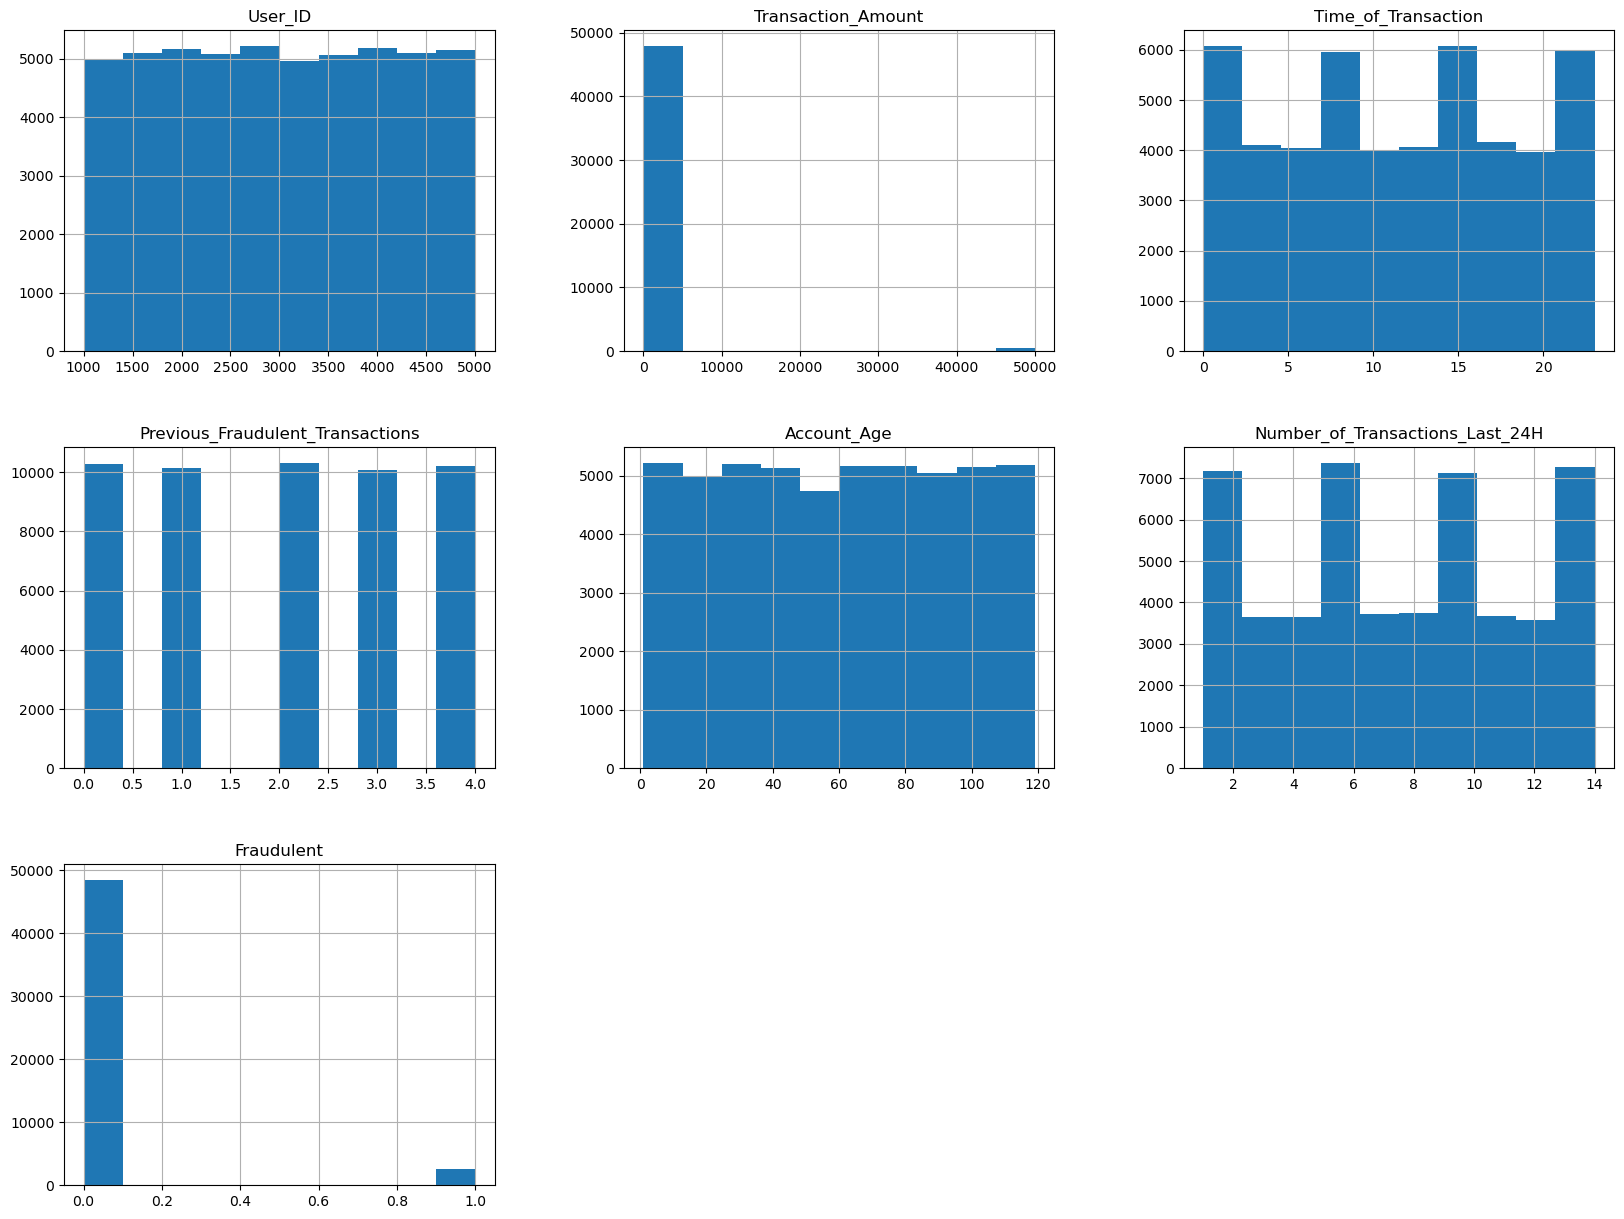

In [31]:
data.hist(figsize=(20,15))
plt.savefig('plt.png')

In [32]:
data.drop_duplicates()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50964,T44427,1830,4187.49,Bank Transfer,4.0,Mobile,Chicago,2,67,13,NaN,0
50975,T44680,4877,1826.49,POS Payment,10.0,Desktop,Houston,1,91,4,Net Banking,0
50985,T39758,2029,544.53,Bank Transfer,14.0,Unknown Device,Chicago,4,59,12,Debit Card,0
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card,0


In [33]:
data["Transaction_Amount"]=data["Transaction_Amount"].fillna(data["Transaction_Amount"].mean())
data['Time_of_Transaction']=data['Time_of_Transaction'].fillna(data['Time_of_Transaction'].mean())
data["Device_Used"]=data["Device_Used"].fillna(data["Device_Used"].mode()[0])
data["Location"]=data["Location"].fillna(data["Location"].mode()[0])
data["Payment_Method"]=data["Payment_Method"].fillna(data["Payment_Method"].mode()[0])

In [37]:
data.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

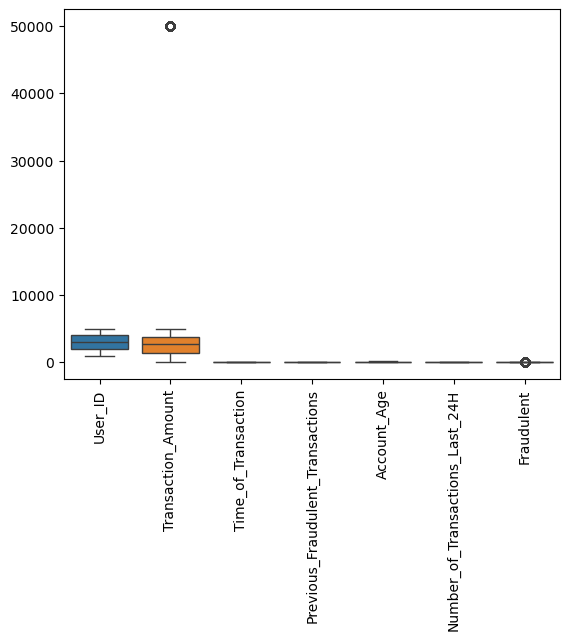

In [41]:
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

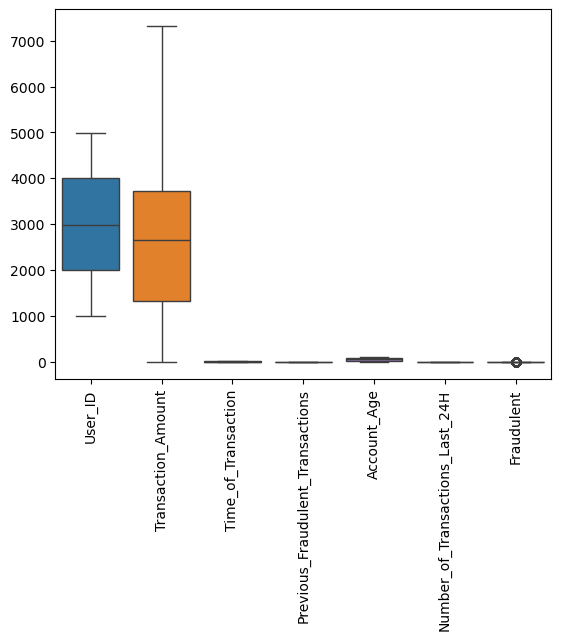

In [42]:
outliers=["Transaction_Amount"]

for i in outliers:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    data.loc [(data[i]>=ub),i]=ub
    data.loc [(data[i]<=lb),i]=lb

sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

In [43]:
b=data.select_dtypes(include="number").corr()
b

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
User_ID,1.000000,0.007855,0.001892,0.002567,0.001749,-0.005847,0.008046
Transaction_Amount,0.007855,1.000000,-0.008422,0.000197,-0.003780,-0.004892,-0.000459
Time_of_Transaction,0.001892,-0.008422,1.000000,-0.003323,-0.002976,-0.009040,0.006845
Previous_Fraudulent_Transactions,0.002567,0.000197,-0.003323,1.000000,0.000956,-0.000303,0.001136
Account_Age,0.001749,-0.003780,-0.002976,0.000956,1.000000,0.004215,0.006203
Number_of_Transactions_Last_24H,-0.005847,-0.004892,-0.009040,-0.000303,0.004215,1.000000,-0.003877
Fraudulent,0.008046,-0.000459,0.006845,0.001136,0.006203,-0.003877,1.000000


<Axes: >

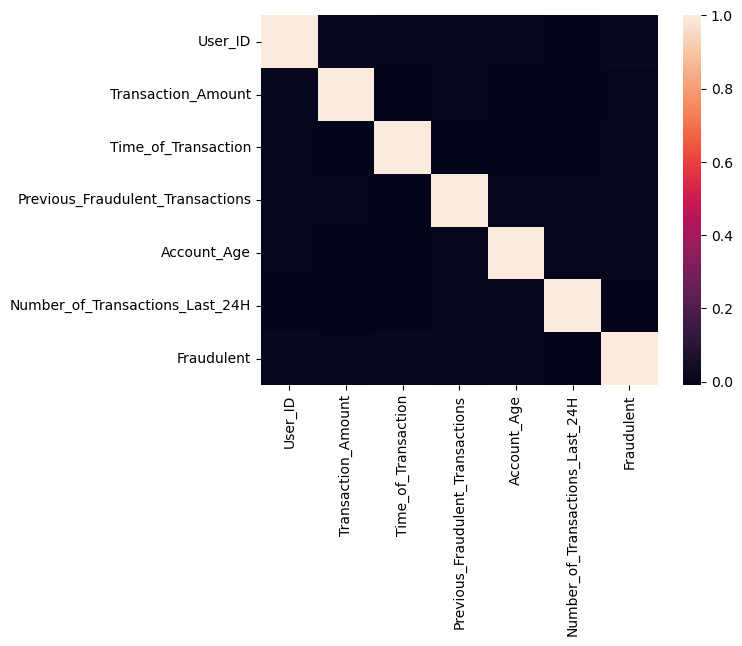

In [44]:
sns.heatmap(b)

In [46]:
le=LabelEncoder()
data["Transaction_ID"]=le.fit_transform(data["Transaction_ID"])
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0,4174,1292.76,ATM Withdrawal,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,11111,4507,1554.58,ATM Withdrawal,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,22222,1860,2395.02,ATM Withdrawal,11.4884,Mobile,Boston,3,115,9,UPI,0
3,33333,2294,100.10,Bill Payment,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,44444,2130,1490.50,POS Payment,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,26648,2339,3112.51,Bill Payment,15.0000,Mobile,New York,0,7,8,Debit Card,0
50996,23626,2152,2897.15,Online Purchase,3.0000,Mobile,Miami,1,75,11,Net Banking,1
50997,2550,3345,2204.43,POS Payment,18.0000,Mobile,San Francisco,3,73,5,Credit Card,0
50998,35876,1518,4787.17,POS Payment,19.0000,Tablet,New York,2,108,14,Net Banking,0


In [47]:
le=LabelEncoder()
data["Transaction_Type"]=le.fit_transform(data["Transaction_Type"])
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0,4174,1292.76,0,16.0000,Tablet,San Francisco,0,119,13,Debit Card,0
1,11111,4507,1554.58,0,13.0000,Mobile,New York,4,79,3,Credit Card,0
2,22222,1860,2395.02,0,11.4884,Mobile,Boston,3,115,9,UPI,0
3,33333,2294,100.10,2,15.0000,Desktop,Chicago,4,3,4,UPI,0
4,44444,2130,1490.50,4,19.0000,Mobile,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,26648,2339,3112.51,2,15.0000,Mobile,New York,0,7,8,Debit Card,0
50996,23626,2152,2897.15,3,3.0000,Mobile,Miami,1,75,11,Net Banking,1
50997,2550,3345,2204.43,4,18.0000,Mobile,San Francisco,3,73,5,Credit Card,0
50998,35876,1518,4787.17,4,19.0000,Tablet,New York,2,108,14,Net Banking,0


In [48]:
le=LabelEncoder()
data["Device_Used"]=le.fit_transform(data["Device_Used"])
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0,4174,1292.76,0,16.0000,2,San Francisco,0,119,13,Debit Card,0
1,11111,4507,1554.58,0,13.0000,1,New York,4,79,3,Credit Card,0
2,22222,1860,2395.02,0,11.4884,1,Boston,3,115,9,UPI,0
3,33333,2294,100.10,2,15.0000,0,Chicago,4,3,4,UPI,0
4,44444,2130,1490.50,4,19.0000,1,San Francisco,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,26648,2339,3112.51,2,15.0000,1,New York,0,7,8,Debit Card,0
50996,23626,2152,2897.15,3,3.0000,1,Miami,1,75,11,Net Banking,1
50997,2550,3345,2204.43,4,18.0000,1,San Francisco,3,73,5,Credit Card,0
50998,35876,1518,4787.17,4,19.0000,2,New York,2,108,14,Net Banking,0


In [51]:
le=LabelEncoder()
data["Location"]=le.fit_transform(data["Location"])
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0,4174,1292.76,0,16.0000,2,6,0,119,13,Debit Card,0
1,11111,4507,1554.58,0,13.0000,1,5,4,79,3,Credit Card,0
2,22222,1860,2395.02,0,11.4884,1,0,3,115,9,UPI,0
3,33333,2294,100.10,2,15.0000,0,1,4,3,4,UPI,0
4,44444,2130,1490.50,4,19.0000,1,6,2,57,7,Credit Card,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,26648,2339,3112.51,2,15.0000,1,5,0,7,8,Debit Card,0
50996,23626,2152,2897.15,3,3.0000,1,4,1,75,11,Net Banking,1
50997,2550,3345,2204.43,4,18.0000,1,6,3,73,5,Credit Card,0
50998,35876,1518,4787.17,4,19.0000,2,5,2,108,14,Net Banking,0


In [53]:
le=LabelEncoder()
data["Payment_Method"]=le.fit_transform(data["Payment_Method"])
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,0,4174,1292.76,0,16.0000,2,6,0,119,13,1,0
1,11111,4507,1554.58,0,13.0000,1,5,4,79,3,0,0
2,22222,1860,2395.02,0,11.4884,1,0,3,115,9,4,0
3,33333,2294,100.10,2,15.0000,0,1,4,3,4,4,0
4,44444,2130,1490.50,4,19.0000,1,6,2,57,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50995,26648,2339,3112.51,2,15.0000,1,5,0,7,8,1,0
50996,23626,2152,2897.15,3,3.0000,1,4,1,75,11,3,1
50997,2550,3345,2204.43,4,18.0000,1,6,3,73,5,0,0
50998,35876,1518,4787.17,4,19.0000,2,5,2,108,14,3,0


In [56]:
x=data.drop(["Fraudulent"],axis=1)
y=data["Fraudulent"]
x

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method
0,0,4174,1292.76,0,16.0000,2,6,0,119,13,1
1,11111,4507,1554.58,0,13.0000,1,5,4,79,3,0
2,22222,1860,2395.02,0,11.4884,1,0,3,115,9,4
3,33333,2294,100.10,2,15.0000,0,1,4,3,4,4
4,44444,2130,1490.50,4,19.0000,1,6,2,57,7,0
...,...,...,...,...,...,...,...,...,...,...,...
50995,26648,2339,3112.51,2,15.0000,1,5,0,7,8,1
50996,23626,2152,2897.15,3,3.0000,1,4,1,75,11,3
50997,2550,3345,2204.43,4,18.0000,1,6,3,73,5,0
50998,35876,1518,4787.17,4,19.0000,2,5,2,108,14,3


In [59]:
y

0        0
1        0
2        0
3        0
4        0
        ..
50995    0
50996    1
50997    0
50998    0
50999    0
Name: Fraudulent, Length: 51000, dtype: int64

In [62]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new

array([[-1.73188265,  1.01368475, -0.86507032, ...,  1.71493866,
         1.36924286, -0.69955237],
       [-0.96233595,  1.30246905, -0.68788807, ...,  0.55159992,
        -1.11829426, -1.33343004],
       [-0.19278926, -0.99306256, -0.11913454, ...,  1.59860479,
         0.37422801,  1.20208064],
       ...,
       [-1.55526992,  0.29475929, -0.24811309, ...,  0.37709911,
        -0.62078684, -1.33343004],
       [ 0.75288534, -1.28965184,  1.49971246, ...,  1.39502051,
         1.61799658,  0.56820297],
       [-1.44971784, -0.59847742, -1.1885758 , ..., -0.29182067,
         0.62298172, -0.0656747 ]])

In [64]:
data["Fraudulent"].unique()

array([0, 1], dtype=int64)

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3, random_state=42)

In [69]:
y_train.unique()

array([0, 1], dtype=int64)

In [71]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [73]:
model.score(x_test,y_test)

0.951437908496732

In [75]:
test_pred=model.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
y_test

4207     0
6583     0
13538    0
38447    0
22267    0
        ..
23417    0
50027    0
27978    0
36757    0
31635    0
Name: Fraudulent, Length: 15300, dtype: int64

In [79]:
train_pred=model.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
y_train

19090    0
18575    0
10414    0
47015    0
13024    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Fraudulent, Length: 35700, dtype: int64

In [83]:
score=accuracy_score(y_test,test_pred)
score

0.951437908496732

In [85]:
score=accuracy_score(y_train,train_pred)
score

0.9505042016806723

In [87]:
model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [88]:
y_pred=model.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
cm=confusion_matrix(y_pred,y)
cm

array([[48490,     0],
       [    0,  2510]], dtype=int64)

In [93]:
cp=classification_report(y_pred,y)
print(cp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48490
           1       1.00      1.00      1.00      2510

    accuracy                           1.00     51000
   macro avg       1.00      1.00      1.00     51000
weighted avg       1.00      1.00      1.00     51000



In [95]:
model.score(x,y)

1.0

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=42)

In [99]:
test_pred=model.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
y_test

4207     0
6583     0
13538    0
38447    0
22267    0
        ..
23417    0
50027    0
27978    0
36757    0
31635    0
Name: Fraudulent, Length: 15300, dtype: int64

In [103]:
acc_score=accuracy_score(y_test,test_pred) 
acc_score

1.0

In [105]:
train_pred=model.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
y_train

19090    0
18575    0
10414    0
47015    0
13024    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Fraudulent, Length: 35700, dtype: int64

In [107]:
acc_score=accuracy_score(y_train,train_pred) 
acc_score

1.0

In [108]:
model=RandomForestClassifier(n_estimators=47,random_state=34)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=47, random_state=34)

In [109]:
test_pred=model.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
y_test

4207     0
6583     0
13538    0
38447    0
22267    0
        ..
23417    0
50027    0
27978    0
36757    0
31635    0
Name: Fraudulent, Length: 15300, dtype: int64

In [112]:
score=accuracy_score(test_pred,y_test)
score    

0.9532026143790849

In [114]:
train_pred=model.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
y_train

19090    0
18575    0
10414    0
47015    0
13024    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Fraudulent, Length: 35700, dtype: int64

In [116]:
score=accuracy_score(train_pred,y_train)
score    

0.999327731092437

In [117]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [118]:
test_pred=model.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
y_test

4207     0
6583     0
13538    0
38447    0
22267    0
        ..
23417    0
50027    0
27978    0
36757    0
31635    0
Name: Fraudulent, Length: 15300, dtype: int64

In [121]:
score=accuracy_score(test_pred,y_test)
score    

0.9513725490196079

In [122]:
train_pred=model.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
y_train

19090    0
18575    0
10414    0
47015    0
13024    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Fraudulent, Length: 35700, dtype: int64

In [124]:
score=accuracy_score(train_pred,y_train)
score    

0.9506442577030813

In [125]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [126]:
test_pred=model.predict(x_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
y_test

4207     0
6583     0
13538    0
38447    0
22267    0
        ..
23417    0
50027    0
27978    0
36757    0
31635    0
Name: Fraudulent, Length: 15300, dtype: int64

In [128]:
score=accuracy_score(test_pred,y_test)
score    

0.951437908496732

In [129]:
train_pred=model.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
y_train

19090    0
18575    0
10414    0
47015    0
13024    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Fraudulent, Length: 35700, dtype: int64

In [131]:
score=accuracy_score(train_pred,y_train)
score    

0.9508963585434174

In [132]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [133]:
model.score(x_test,y_test)

0.9513725490196079

In [134]:
score=accuracy_score(test_pred,y_test)
score

0.951437908496732

In [135]:
train_pred=model.predict(x_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [136]:
y_train

19090    0
18575    0
10414    0
47015    0
13024    0
        ..
11284    0
44732    0
38158    0
860      0
15795    0
Name: Fraudulent, Length: 35700, dtype: int64

In [167]:
score=accuracy_score(train_pred,y_train)
score    

0.9582913165266106